In [1]:
import IPython.display as ipd
ipd.Audio("E:/Thesis/Dataset/UrbanSound8K/audio/fold4/344-3-5-0.wav")

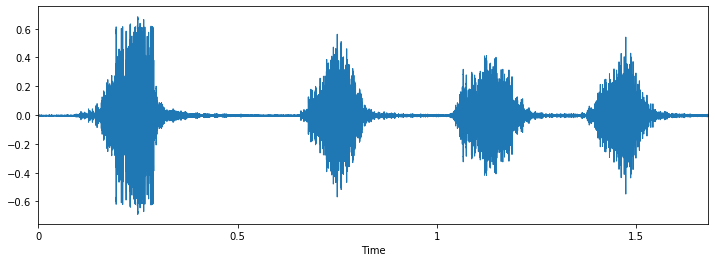

In [2]:
#Loading a sample from a class
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt

filename = "E:/Thesis/Dataset/UrbanSound8K/audio/fold4/344-3-5-0.wav"
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
_=librosa.display.waveplot(data, sr=sample_rate)

In [3]:
ipd.Audio(filename)

# The following class is dog_barking

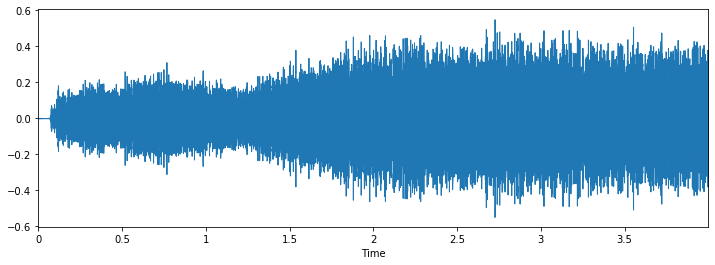

In [4]:
filename="E:/Thesis/Dataset/UrbanSound8K/audio/fold6/24364-4-0-0.wav"
plt.figure(figsize=(12,4))
data, sample_rate= librosa.load(filename)
_=librosa.display.waveplot(data, sr=sample_rate)

In [5]:
ipd.Audio(filename)

# The Following class is drilling_sound

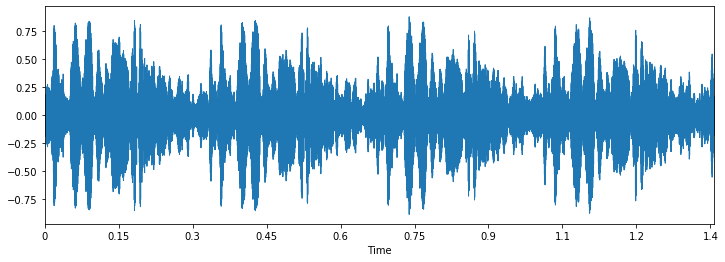

In [6]:
filename = "E:/Thesis/Dataset/UrbanSound8K/audio/fold8/98536-8-0-0.wav"
plt.figure(figsize=(12,4))
data, sample_rate = librosa.load(filename)
_=librosa.display.waveplot(data, sr=sample_rate)

In [7]:
ipd.Audio(filename)

# The following class is Siren_sound

# Loading the CSV file and extracting the features.

In [8]:
import pandas as pd
metadata= pd.read_csv('E:/Thesis/Dataset/UrbanSound8K/metadata/Urbansound8k.csv')

In [9]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
slice_file_name    8732 non-null object
fsID               8732 non-null int64
start              8732 non-null float64
end                8732 non-null float64
salience           8732 non-null int64
fold               8732 non-null int64
classID            8732 non-null int64
class_name         8732 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [10]:
metadata.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

         class_name  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [11]:
metadata.tail()

slice_file_name   fsID       start         end  salience  fold  classID  \
8727  99812-1-2-0.wav  99812  159.522205  163.522205         2     7        1   
8728  99812-1-3-0.wav  99812  181.142431  183.284976         2     7        1   
8729  99812-1-4-0.wav  99812  242.691902  246.197885         2     7        1   
8730  99812-1-5-0.wav  99812  253.209850  255.741948         2     7        1   
8731  99812-1-6-0.wav  99812  332.289233  334.821332         2     7        1   

     class_name  
8727   car_horn  
8728   car_horn  
8729   car_horn  
8730   car_horn  
8731   car_horn

In [12]:
metadata.describe()

fsID        start          end     salience         fold  \
count    8732.000000  8732.000000  8732.000000  8732.000000  8732.000000   
mean   116033.493816    38.645409    42.253312     1.347000     5.385937   
std     57991.017218    74.292126    74.369669     0.476043     2.846820   
min       344.000000     0.000000     0.105962     1.000000     1.000000   
25%     69942.250000     3.000000     6.839398     1.000000     3.000000   
50%    118279.000000    10.376492    14.000000     1.000000     5.000000   
75%    166942.000000    35.131372    38.866979     2.000000     8.000000   
max    209992.000000   600.125356   604.125356     2.000000    10.000000   

           classID  
count  8732.000000  
mean      4.592877  
std       2.894544  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       7.000000  
max       9.000000

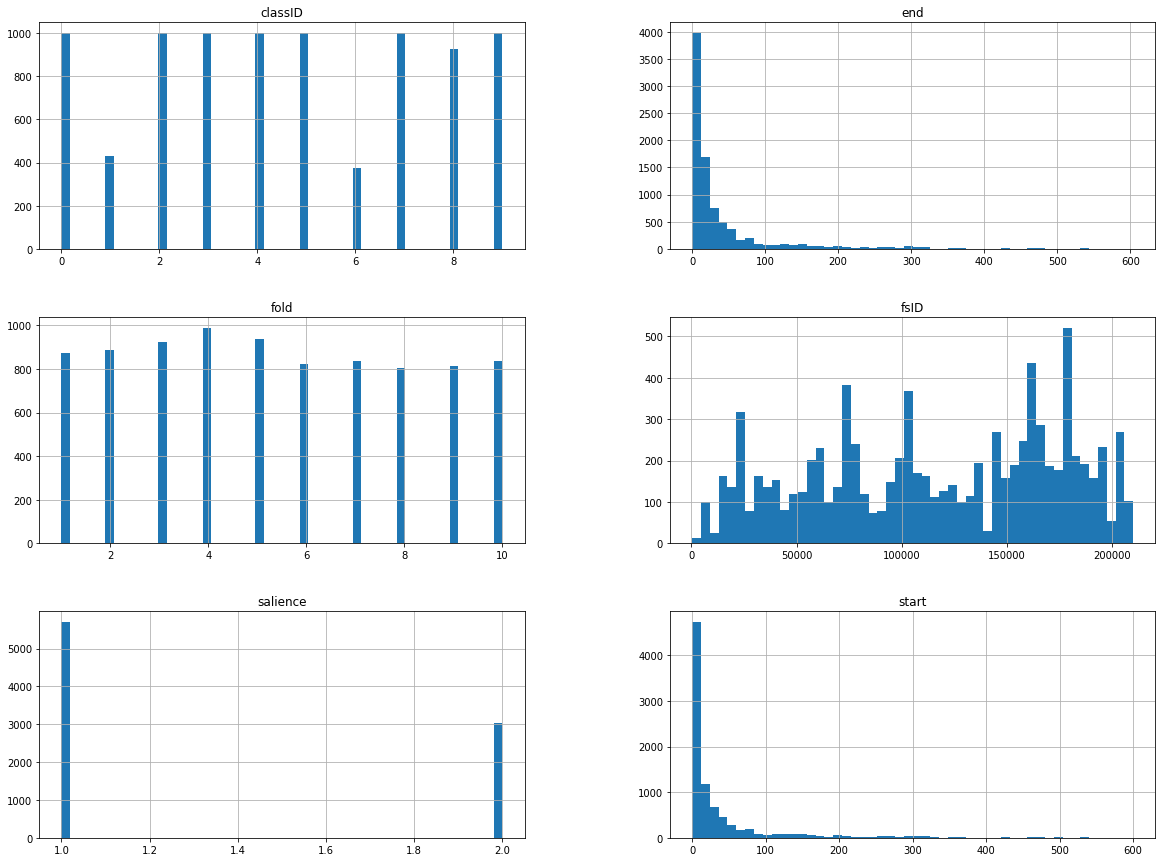

In [13]:
metadata.hist(bins=50 , figsize=(20, 15))
plt.show()

In [14]:
corr_matrix=metadata.corr()
corr_matrix["classID"].sort_values(ascending=False)

classID     1.000000
end         0.136553
start       0.135822
salience    0.001545
fold       -0.020502
fsID       -0.050064
Name: classID, dtype: float64

In [15]:
print(metadata.class_name.value_counts())

jackhammer          1000
street_music        1000
drilling            1000
children_playing    1000
dog_bark            1000
engine_idling       1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class_name, dtype: int64


# # Generating the MFCC of Dog Barking

In [16]:
import librosa
from scipy.io import wavfile as wav
import numpy as np
filename = "E:/Thesis/Dataset/UrbanSound8K/audio/fold4/344-3-5-0.wav"

librosa_audio, librosa_sample_rate=librosa.load(filename)
scipy_sample_rate, scipy_audio=wav.read(filename)

print('Orginal audio data', scipy_audio)
print('Orginal sample rate', scipy_sample_rate)
print('Librosa audio data', librosa_audio)
print('Librosa sample rate', librosa_sample_rate)
ipd.Audio(filename)

Orginal audio data [  3  -3 -15 ...  21   4 -16]
Orginal sample rate 48000
Librosa audio data [ 2.2728866e-05 -4.2073693e-04 -9.0678880e-04 ...  9.9527719e-04
  1.2307205e-03  1.1918487e-04]
Librosa sample rate 22050


In [17]:
print('Original audio min/max range', np.min(scipy_audio),'to',np.max(scipy_audio))
print('Librosa audio min/max range', np.min(librosa_audio),'to', np.max(librosa_audio))

Original audio min/max range -22295 to 20467
Librosa audio min/max range -0.68626004 to 0.636417


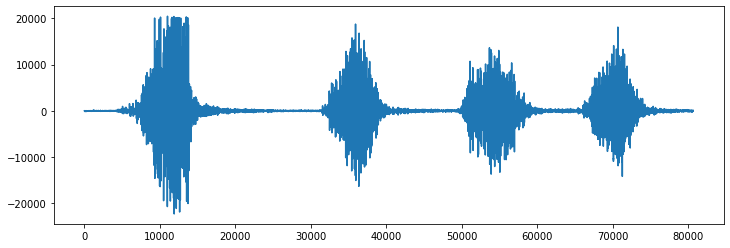

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(scipy_audio)

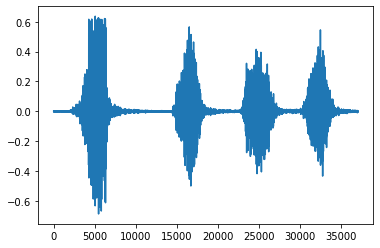

In [19]:
plt.plot(librosa_audio)

In [20]:
mfccs = librosa.feature.mfcc(y=librosa_audio ,sr=librosa_sample_rate,hop_length=512)
print(mfccs.shape)

(20, 73)


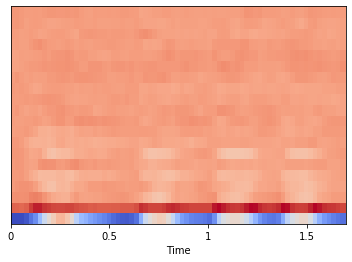

In [21]:
librosa.display.specshow(mfccs , sr=librosa_sample_rate , x_axis='time')

In [22]:
#mfccs=librosa.feature.mfcc(y=scipy_audio , sr=scipy_sample_rate, n_mfcc=40)
#print(mfccs.shape)
#librosa.display.specshow(mfccs , sr=scipy_sample_rate, x_axis='Time')

In [23]:
print(librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate, hop_length=512 ,))

[[-4.75742798e+02 -4.73901764e+02 -4.75206360e+02 ... -3.97253998e+02
  -4.11900269e+02 -4.23133087e+02]
 [ 8.06462097e+01  7.66108398e+01  7.31985474e+01 ...  1.26723221e+02
   1.20031601e+02  1.12464874e+02]
 [ 1.69459324e+01  1.95289097e+01  1.80571556e+01 ... -5.73958158e-01
  -3.09317827e-01  7.08411455e-01]
 ...
 [-2.05923557e-01 -3.17844892e+00 -7.69613981e+00 ... -1.39523449e+01
  -1.07069635e+01 -7.89309311e+00]
 [ 6.12460995e+00  7.48531771e+00  2.07247472e+00 ... -1.32859650e+01
  -9.08278942e+00 -8.10676003e+00]
 [ 7.20523596e+00  6.47224045e+00  2.87973881e+00 ... -9.16207790e-01
  -3.00964856e+00 -1.99544764e+00]]


# # Generating the MFCC of Siren

In [24]:
filename2='E:/Thesis/Dataset/UrbanSound8K/audio/fold8/98536-8-0-0.wav'
librosa_audio, librosa_sample_rate=librosa.load(filename2)
scipy_sample_rate, scipy_audio=wav.read(filename2)
print('Orginal audio', scipy_audio)
print('Orginal sample rate', scipy_sample_rate)
print('Librosa audio',librosa_audio)
print('Librosa sample rate', librosa_sample_rate)
ipd.Audio(filename2)

Orginal audio [-2200 -3736 -4859 ...  1228  2542  3491]
Orginal sample rate 44100
Librosa audio [-0.05833706 -0.15375717 -0.18768227 ...  0.03840468  0.01122915
  0.08223956]
Librosa sample rate 22050


In [25]:
print('Original audio min/max range', np.min(scipy_audio),'to',np.max(scipy_audio))
print('Librosa audio min/max range', np.min(librosa_audio),'to', np.max(librosa_audio))

Original audio min/max range -27527 to 28989
Librosa audio min/max range -0.83686453 to 0.8844968


In [26]:
mfccs2=librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate)
print(mfccs2.shape)

(20, 59)


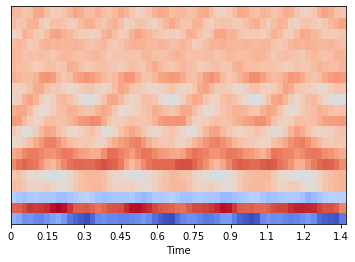

In [27]:
librosa.display.specshow(mfccs2, sr=librosa_sample_rate , x_axis='time')
ipd.Audio(filename2)

## Generating the MFCC from Drilling Sound

Orginal audio [[   151      8]
 [   147      8]
 [   146      0]
 ...
 [ -8564  -2069]
 [ -7532  -2432]
 [-11234  -3105]]
Orginal sample rate 44100
Librosa audio [ 0.00178572  0.00242739  0.00179459 ... -0.07013007 -0.0397079
 -0.18961981]
Librosa sample rate 22050
Original audio min/max range -30657 to 31430
Librosa audio min/max range -0.50916725 to 0.55070406


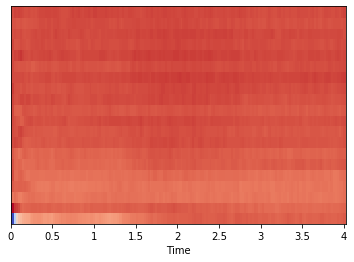

In [28]:
filename3='E:/Thesis/Dataset/UrbanSound8K/audio/fold6/24364-4-0-0.wav'
librosa_audio, librosa_sample_rate=librosa.load(filename3)
scipy_sample_rate, scipy_audio=wav.read(filename3)
print('Orginal audio', scipy_audio)
print('Orginal sample rate', scipy_sample_rate)
print('Librosa audio',librosa_audio)
print('Librosa sample rate', librosa_sample_rate)
print('Original audio min/max range', np.min(scipy_audio),'to',np.max(scipy_audio))
print('Librosa audio min/max range', np.min(librosa_audio),'to', np.max(librosa_audio))
mfccs3=librosa.feature.mfcc(y=librosa_audio, sr=librosa_sample_rate ) 
librosa.display.specshow(mfccs3, sr=librosa_sample_rate , x_axis='time')
ipd.Audio(filename3)
#print(mfccs3)

# Generating Chroma_stft , mellogspectrogram , spectral_contrast, tonnetz for DRILLING SOUND

In [29]:
import librosa 
import librosa.display
stft=librosa.stft(librosa_audio)
chroma=librosa.feature.chroma_stft(S=stft, sr=librosa_sample_rate)

### Chroma_stft of Drilling

(12, 173)


C:\Users\User\Anaconda3\lib\site-packages\librosa\display.py:725: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


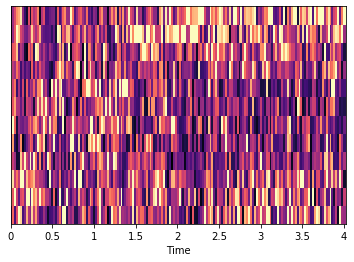

In [30]:
librosa.display.specshow(chroma, sr=librosa_sample_rate , x_axis='time')
ipd.Audio(filename3)
print(chroma.shape)

### Mel log spectrogram of Drilling_Sound

time to extract feature from one file: 0.001sec
(128, 173)


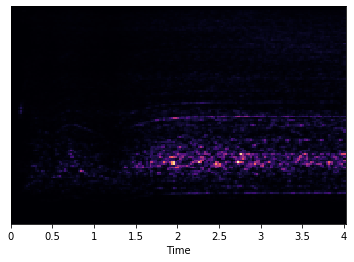

In [31]:
from timeit import default_timer as timer
start_time=timer();
mel=librosa.feature.melspectrogram(librosa_audio, sr=librosa_sample_rate )
librosa.display.specshow(mel , sr=librosa_sample_rate, x_axis='time')
end_time=timer();
ipd.Audio(filename3)
print('time to extract feature from one file: {:.3f}sec'.format((end_time-start_time)/60))
print(mel.shape)

### Spectral_Contrast of Drilling_Sound

(7, 173)


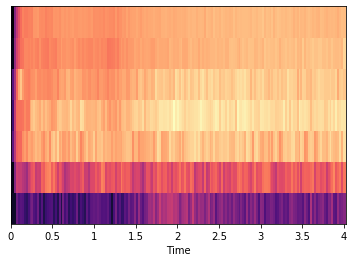

In [46]:
contrast=librosa.feature.spectral_contrast(S=stft, sr=librosa_sample_rate)
librosa.display.specshow(contrast, sr=librosa_sample_rate, x_axis='time')
print(contrast.shape)

### Tonnetz of Drilling_Sound

time to extract feature from one file: 0.012sec
(6, 173)


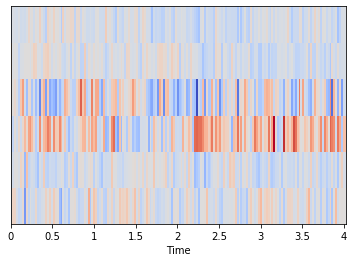

In [33]:
from timeit import default_timer as timer
start_time=timer()
tonnetz=librosa.feature.tonnetz(y=librosa.effects.harmonic(librosa_audio),sr=librosa_sample_rate)
librosa.display.specshow(tonnetz, sr=librosa_sample_rate, x_axis='time')
end_time=timer()
print('time to extract feature from one file: {:.3f}sec'.format((end_time-start_time)/60))
print(tonnetz.shape)

In [34]:
ipd.Audio(filename3)

In [35]:
#chrom_cq=librosa.feature.chroma_cqt(y=librosa.effects.harmonic(librosa_audio), sr=librosa_sample_rate)
#librosa.display.specshow(chroma_cq, sr=librosa_sample_rate , x_axis="time")

In [36]:
#librosa.display.specshow(chroma_cq, sr=librosa_sample_rate, x_axis='time')

# Stacking the 5 features into one matrix

In [39]:
filename = "E:/Thesis/Dataset/UrbanSound8K/audio/fold3/6988-5-0-4.wav"
ipd.Audio(filename)
y, sr=librosa.load(filename)
mfccs=librosa.feature.mfcc(y , sr , n_mfcc=40)
melspectrogram =librosa.feature.melspectrogram(y, sr , n_mels=40, fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y , sr, n_chroma=40)
stft=librosa.stft(filename)
spectral_contrast=librosa.feature.spectral_contrast(S=stft , sr )